In [8]:
import all_imports
from importlib import reload
reload(all_imports)
from all_imports import *

### Загрузка данных для обучения и валидации

In [9]:
train_data, train_label, train_rating, test_data, test_label, test_rating = load_data()

### Предобработка текста и токенизация

In [10]:
tokenizer = WordPunctTokenizer()
texts_train = tokenize(tokenizer, train_data)
texts_test = tokenize(tokenizer, test_data)

### Формирование эмбэддингов на основе предобученных на текстах похожего типа

In [11]:
gensim_embedding_model = api.load('glove-twitter-200')

X_train_emb = [text_to_average_embedding(text, tokenizer, gensim_embedding_model) for text in texts_train]
X_test_emb = [text_to_average_embedding(text, tokenizer, gensim_embedding_model) for text in texts_test]

### Инициализация и обучение модели

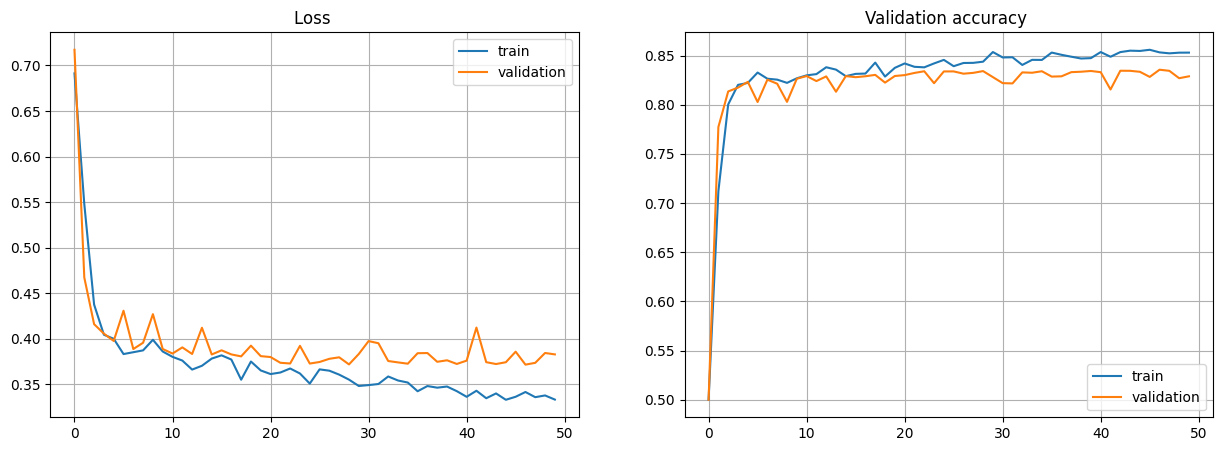

In [12]:
target_size = max(train_label) + 1

class_weights = calculate_weights(train_label, target_size)

model_label = create_model(len(X_train_emb[0]), target_size)

loss_function = nn.CrossEntropyLoss(weight=class_weights)
opt = torch.optim.Adam(model_label.parameters(), lr=1e-3)

model_label = train_model(model_label, opt, loss_function, X_train_emb, train_label, X_test_emb, test_label, n_iterations=5000)

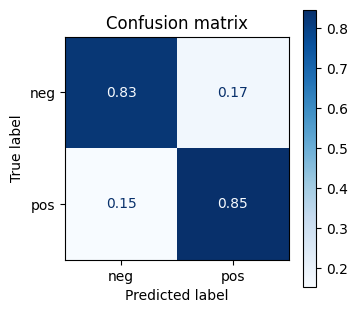

In [13]:
visualize_results(model_label, X_train_emb, X_test_emb, train_label, test_label, target_size)

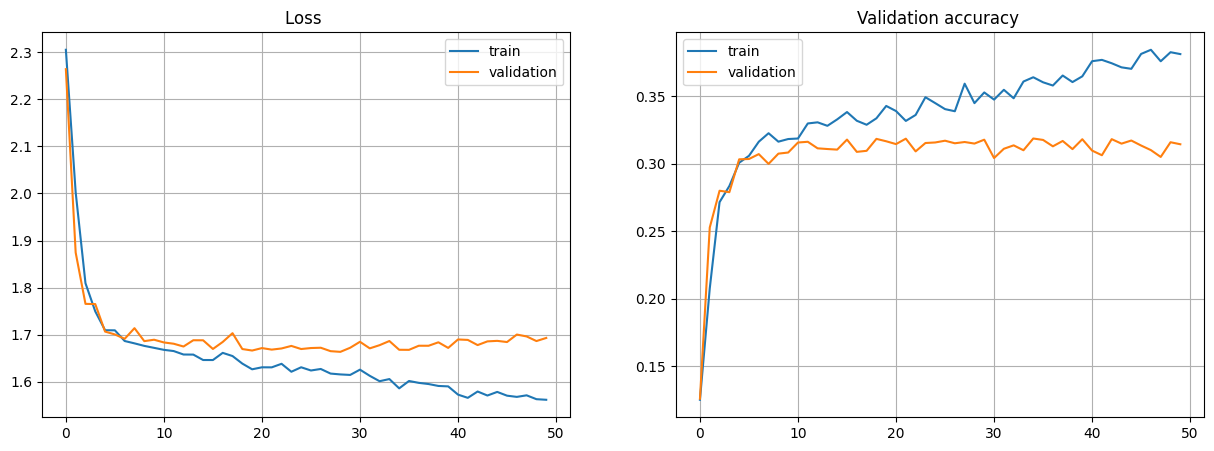

In [14]:
target_size = max(train_rating) + 1

class_weights = calculate_weights(train_rating, target_size)

model_rating = create_model(len(X_train_emb[0]), target_size)

loss_function = nn.CrossEntropyLoss(weight=class_weights)
opt = torch.optim.Adam(model_rating.parameters(), lr=1e-3)

model_rating = train_model(model_rating, opt, loss_function, X_train_emb, train_rating, X_test_emb, test_rating, n_iterations=5000)

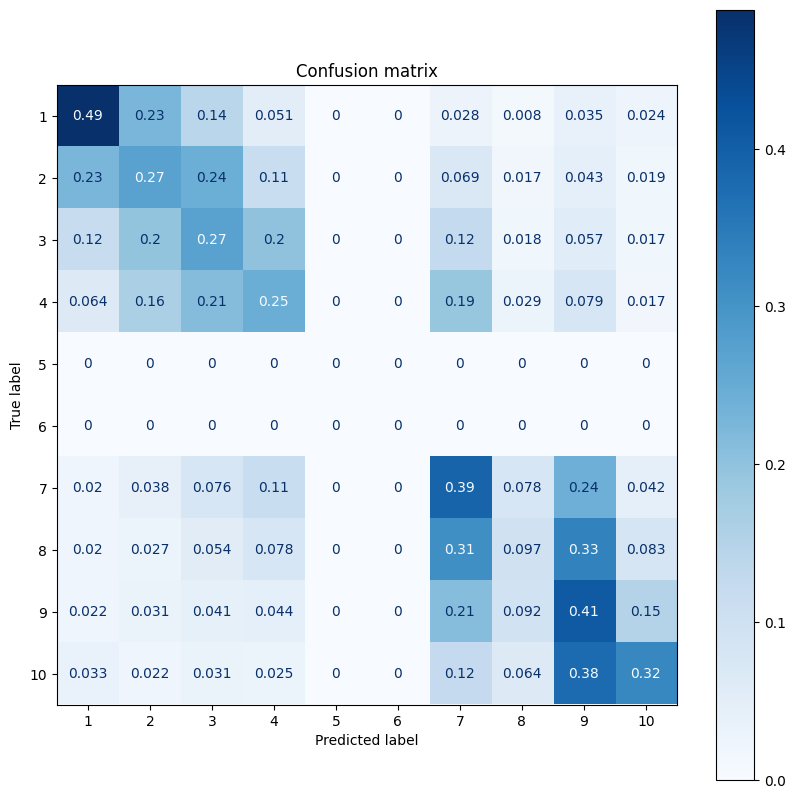

In [15]:
visualize_results(model_rating, X_train_emb, X_test_emb, train_rating, test_rating, target_size)

### Определение характера и рейтинга по отзыву

In [17]:
rewiew = 'The worst movie I ever see.'
get_prediction(rewiew, tokenizer, gensim_embedding_model, model_label, model_rating)

Rewiew label is   neg
Rewiew rating is  1


In [18]:
rewiew = 'I love this movie so much.'
get_prediction(rewiew, tokenizer, gensim_embedding_model, model_label, model_rating)

Rewiew label is   pos
Rewiew rating is  10


In [19]:
rewiew = 'I hate playing, but colors is really good.'
get_prediction(rewiew, tokenizer, gensim_embedding_model, model_label, model_rating)

Rewiew label is   pos
Rewiew rating is  7


In [20]:
rewiew = 'I think its really strange, but i like it.'
get_prediction(rewiew, tokenizer, gensim_embedding_model, model_label, model_rating)

Rewiew label is   pos
Rewiew rating is  7
